
# Simulation and Evaluation models: endurance of the actuator

*Written by Marc Budinger (INSA Toulouse), Toulouse, France*

In this course:
- simulation models are used to calculate power transfers between the components of the system to be designed 
- evaluation models are used to calculate the equivalent quantities useful for selecting a component.

We will illustrate these concepts using endurance scenarios for the TVC system. 

## Nozzle equivalent model

The nozzle is composed of:  
- a flexible bearing or flexseal which links the nozzle to the launcher and enables rotational movement. The equivalent characteristics and parameters for this flexible bearing are: a stiffness of 15200 Nm/deg, a viscous damping of 174 Nms/deg
- a rigid cone modeled here as an inertia of 1400 kg.m^2

This nozzle is set in motion by the EMA actuator via a lever arm equivalent to 1.35 m.


In [1]:
# Definition of nozzle equivalent parameters with engineering units
Jnozzle = 1.40e03  # [kg.m2] Inertia
Knozzle = 1.52e04  # [Nm/deg] Stiffness
Fnozzle = 1.74e02  # [Nms/deg] Viscous damping

lever_arm = 1.35  # [m] Lever Arm



## Endurance specifications

In the description of the TVC system given in the [following article](http://esmats.eu/esmatspapers/pastpapers/pdfs/2009/vanthuyne.pdf) an endurance test profile composed of multiple sinusoidal displacements is given. 

*Endurance profile for P80 EMA*

![Endurance profile](./assets/images/EnduranceP80.png)

The followinf cell declare the magnitude displacement, frequency and number of cycles (divided by 100 here) informations in 1D arrays (numpy) for cycles 1 to 6 in a global a Pandas [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) called 'Profil'.

In [10]:
from IPython.display import Markdown as md  # enable Markdown printing
import numpy as np
import pandas as pd
from math import pi

# Declaration of amplitude, frequency and number of cycles 1 to 6

stroke = 6 * pi / 180 * lever_arm  # [m] Stroke

profil = pd.DataFrame(
    {
        "A": np.array([0.95, 0.5, 0.3, 0.1, 0.05, 0.05]) * stroke,
        "f": np.array([0.3, 0.6, 1, 2, 5, 3]),
        "Nc": np.array([3700, 4800, 5000, 7000, 8500, 1500]) / 100,
    }
)

profil

,A,f,Nc
0,0.134303,0.3,37.0
1,0.070686,0.6,48.0
2,0.042412,1.0,50.0
3,0.014137,2.0,70.0
4,0.007069,5.0,85.0
5,0.007069,3.0,15.0


with:  
- A [m], magnitude of stroke;
- f [Hz], frequency;
- Nc [-], number of cycles.


## Force mission profile

**Exercice:** Knowing the main characteristics of the nozzle, give expression of the mechanical force to be applied by the actuation system. Complete the table with a max force (Fmax) column.

In [ ]:
import math.pi as pi

# Calculate SI unit values of Knozzle and Fnozzle
# pi value is math.pi
Knozzle = Knozzle / (pi / 180)
Fnozzle = Fnozzle / (pi / 180)



## Equivalent mean torque

**Question:** What torques need to be calculated to ensure the performance and endurance of the electric motor? Recall the assumptions used in the calculations and the validity of these quantities. 

The overall mechanical transmission ratio between the translational movement of the actuator and the rotation of the motor is 1.22 mm/rad. The motor inertia is 2.75 x 10⁻³ kg·m². 

**Question:** Complete the table above with the maximum electromagnetic torque and the RMS torque to be provided by the electric motor. In which phases does motor inertia play an important role?


In [11]:
# Definition of transmission ratio and inertia
p_ratio = 10e-3/2/3.14/1.3 # [m/rad] global equivalent transmission ratio
J_mot = 2.75e-3 # [kg.m²] motor inertia 


In [14]:
# Cmax = J.dw
profil.A*2*3.14*profil.f

0    0.253027
1    0.266344
2    0.266344
3    0.177563
4    0.221954
5    0.133172
dtype: float64

## Analytic calculation of equivalent rolling force

The following figures show the evolution of the actuator forces as a function of the position, speed and acceleration. 

*Scatter plot of force profil for different inputs*
![Plot profil](./assets/images/EnduranceProfilHyp.png)

The rolling fatigue for a variable mission profile is evaluated in two stages:
- firstly by calculating the number of revolutions and an equivalent rolling fatigue effort called $F_{RMC}$ (RMC for RootMean Cube)  
$F_{RMC}=(\frac{1}{\int |\dot{x}| {d}t} \int |F|^3 |\dot{x}| {d}t)^{1/3}$
- then by obtaining a fatigue effort $F_d$ equivalent to 1 million rev.   
$F_d^3 . N_{ref} = F_{RMC}^3. N_{cycles}$

> Exercice: Derive from the previous figure a simplified approach allowing to calculate the rolling fatigue stress in a fast way directly from the table of specifications of fatigue life cycles. 

We will assume here that the screw/nut system has a pitch of 10 mm/rev. Examples of thrust bearings can be found [here](./PDF/MatchedBearingSKF.pdf).

> Exercice: Calculate $F_{RMC}$ and $F_d$. Compare relative ratio between $C_0$ and $C_d$. Conclusion.  

The force is mainly proportional to the position:  therefore the effect of the stiffness of the flexible bearing dominates this fatigue cycle. In this case the calculation of the fatigue force can be carried out analytically using the following equations:  
$F_{RMC}=(\frac{1}{\int |\dot{x}| {d}t} \int |F|^3 |\dot{x}| {d}t)^{1/3}$  
where:  
- $F(t)=Kx(t)=F_kcos(\omega_kt)$  with $x(t)=X_kcos(\omega_kt)$ and $F_k=KX_k$    
- $\dot{x}(t)=-X_k\omega_ksin(\omega_kt)$  
with:
- $F_k$ magnitude of sinusoidal forces;
- $A_k$ magnitude of sinusoidal displacements;
- $N_k$ 

Thus:  
$F_{RMC}^3 = \frac{\sum{\frac{F_k^3}{4}A_k N_k}}{\sum{A_k N_k}}$  

We have used following trigonometric formula:  
$cos(\theta)^3sin(\theta) = cos(\theta)^2 sin(\theta)cos(\theta) = \frac{1+cos(2\theta)}{2} \frac{sin(2\theta)}{2}  $  


In [8]:
# Profil
fatigue_profil = pd.DataFrame(
    {
        "A": np.array([0.95, 0.5, 0.3, 0.1, 0.05, 0.05]) * stroke,
        "f": np.array([0.3, 0.6, 1, 2, 5, 3]),
        "Nc": np.array([3700, 4800, 5000, 7000, 8500, 1500]),
    }
)

fatigue_profil["max_force"] = fatigue_profil["A"] * Knozzle / lever_arm**2
fatigue_profil["distance"] = fatigue_profil["A"] * fatigue_profil["Nc"] * 4

fatigue_profil["Feq^3 Distance"] = (
    (fatigue_profil["max_force"]) ** 3 * fatigue_profil["distance"] / 4
)

fatigue_profil

,A,f,Nc,max_force,distance,Feq^3 Distance
0,0.134303,0.3,3700,64177.777778,1987.685672,1.313535e+17
1,0.070686,0.6,4800,33777.777778,1357.168026,1.307576e+16
2,0.042412,1.0,5000,20266.666667,848.230016,1.765227e+15
3,0.014137,2.0,7000,6755.555556,395.840674,3.051010e+13
4,0.007069,5.0,8500,3377.777778,240.331838,2.315499e+12
5,0.007069,3.0,1500,3377.777778,42.411501,4.086174e+11


In [9]:
Frmc = (fatigue_profil["Feq^3 Distance"].sum() / fatigue_profil["distance"].sum()) ** (1 / 3)

md(
    """
The calculated Root Mean Cube force is *F<sub>RMC</sub>* = {:.0f} kN 
which can be compared to previous result.
""".format(
        FRMC / 1e3
    )
)


The calculated Root Mean Cube force is *F<sub>RMC</sub>* = 31 kN 
which can be compared to previous result.


## Direct validation with test profiles

The target is now to generate from this specification a set of time vectors representing the displacement, speed and acceleration in order to validate previous calculations.  
For that a [function](https://anh.cs.luc.edu/python/hands-on/3.1/handsonHtml/functions.html) which take as parameters a dataframe *profil* and a time step and return the desired time vectors is first defined. 
Remark: 'arange', 'concatenate' and 'array' functions of numpy can be usefull. 

In [16]:
def test_profiles(profil, step_size):
    tmin = 0
    time = np.array([])
    position = np.array([])
    speed = np.array([])
    acceleration = np.array([])
    for A, f, Nc in zip(profil.A, profil.f, profil.Nc):
        tmax = Nc / f
        # time vector
        t = np.arange(tmin, tmin + tmax, step_size)
        # Position, speed and Acceleration vectors
        X = A * np.sin(2 * pi * f * t)
        Xp = A * 2 * pi * f * np.cos(2 * pi * f * t)
        Xpp = -A * (2 * pi * f) ** 2 * np.sin(2 * pi * f * t)
        # Concatenation of multiple cycles
        time = np.concatenate((time, t))
        position = np.concatenate((position, X))
        speed = np.concatenate((speed, Xp))
        acceleration = np.concatenate((acceleration, Xpp))
        # new start time for the next cycle
        tmin = tmin + tmax

    d = {
        "t": time,
        "position": position,
        "speed": speed,
        "acceleration": acceleration,
    }

    df = pd.DataFrame(data=d)

    return df


df = test_profiles(profil, 1 / max(profil.f) / 20)

df

,t,position,speed,acceleration
0,0.000000,0.000000,0.253155,-0.000000
1,0.010000,0.002531,0.253110,-0.008994
2,0.020000,0.005062,0.252975,-0.017985
3,0.030000,0.007591,0.252751,-0.026970
4,0.040000,0.010117,0.252436,-0.035945
...,...,...,...,...
31030,310.283333,-0.005719,0.078316,2.031853
31031,310.293333,-0.004839,0.097128,1.719246
31032,310.303333,-0.003788,0.112498,1.345734
31033,310.313333,-0.002602,0.123883,0.924548


The combination of cycles can now be plot :

Text(0, 0.5, 'Acceleration [m/s²]')

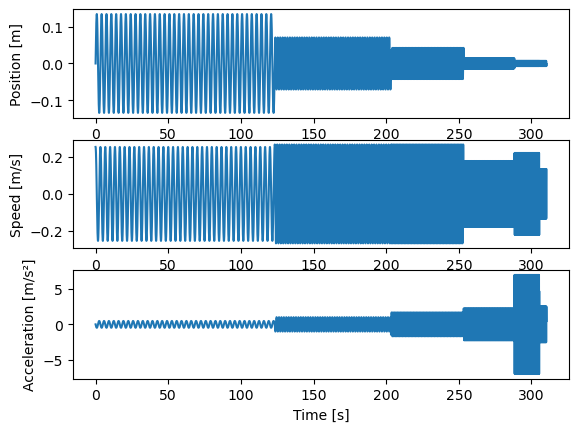

In [17]:
import matplotlib.pyplot as plt

# Position
plt.figure()
plt.subplot(311, xlabel="Time [s]")
plt.plot(df["t"], df["position"])
plt.ylabel("Position [m]")

# Speed
plt.subplot(312, xlabel="Time [s]")
plt.plot(df["t"], df["speed"])
plt.ylabel("Speed [m/s]")

# Acceleration
plt.subplot(313, xlabel="Time [s]")
plt.plot(df["t"], df["acceleration"])
plt.ylabel("Acceleration [m/s²]")

The actuation force can be derived. 

Text(0.5, 0, 'Time (s)')

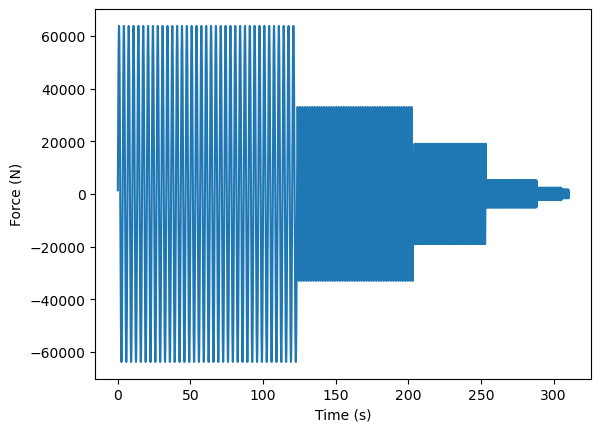

In [18]:
# Definition of nozzle equivalent parameters with engineering units
Jnozzle = 1.40e03  # [kg.m2] Inertia
Knozzle = 1.52e04  # [Nm/deg] Stiffness
Fnozzle = 1.74e02  # [Nms/deg] Viscous damping

# Calculate SI unit values of Knozzle and Fnozzle
# pi value is math.pi

Knozzle = Knozzle / (pi / 180)
Fnozzle = Fnozzle / (pi / 180)

# Angular mission profiles (nozzle)
df["teta"] = df["position"] / lever_arm
df["tetap"] = df["speed"] / lever_arm
df["tetapp"] = df["acceleration"] / lever_arm

# Torque and force calculation
df["Fact"] = (Jnozzle * df["tetapp"] + Fnozzle * df["tetap"] + Knozzle * df["teta"]) / lever_arm

# Plot force mission profile
plt.plot(df["t"], df["Fact"])
plt.ylabel("Force (N)")
plt.xlabel("Time (s)")

The following plots of the force can be usefull to represent the influence of position, speed and acceleration variables. 

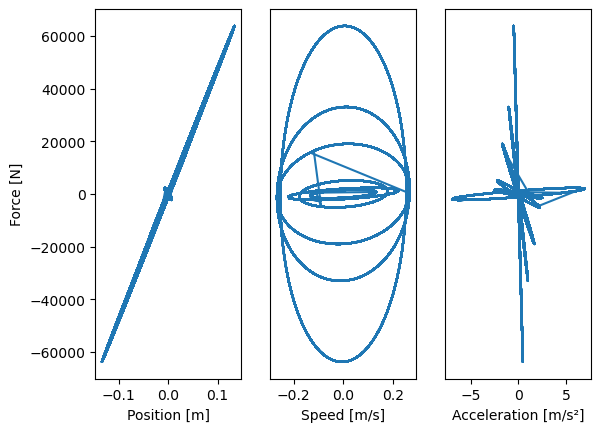

In [19]:
# Plot force mission profile
plt.figure(3)

plt.subplot(131)
plt.plot(df["position"], df["Fact"])
plt.ylabel("Force [N]")
plt.xlabel("Position [m]")

plt.subplot(132)
plt.plot(df["speed"], df["Fact"])
plt.xlabel("Speed [m/s]")
plt.gca().axes.get_yaxis().set_visible(False)

plt.subplot(133)
plt.plot(df["acceleration"], df["Fact"])
plt.xlabel("Acceleration [m/s²]")
plt.gca().axes.get_yaxis().set_visible(False)

Here we calculate RMC force and equivalent dynamic force with the mission profile which is saved in the `FatigueProfil.xlsx` file.

In [20]:
pitch = 10e-3  # [m/rev] pitch of the roller screw

# Computation of integrals avec np.trapz

# Global distance
distance = np.trapz(abs(df["speed"]), df["t"])

# Cumulative damage
FcubeD = np.trapz(abs(df["Fact"] ** 3 * df["speed"]), df["t"])

# Root Mean Cube
FRMC = (FcubeD / distance) ** (1 / 3)

# Number of rev for the mission profile
Nturn = distance * 100 / pitch

# Dynamic equivalent load
Fd = FRMC * (Nturn / 1e6) ** (1 / 3)

md(
    """
The Root Mean Cube force is *F<sub>RMC</sub>* = {:.0f} kN   
The number of turns = {:.2g}  
The equivalent dynamic load for one million revolutions is *F<sub>d</sub>* = {:.0f} kN
""".format(
        FRMC / 1e3, Nturn, Fd / 1e3
    )
)


The Root Mean Cube force is *F<sub>RMC</sub>* = 31 kN   
The number of turns = 4.9e+05  
The equivalent dynamic load for one million revolutions is *F<sub>d</sub>* = 24 kN


In [21]:
# Profil mission export to excel
df.to_excel("FatigueProfil.xlsx")